In [1]:
import warnings; warnings.filterwarnings('ignore')
import matplotlib, tarfile, shutil, os, glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
font = {'size'   : 15}
matplotlib.rc('font', **font)

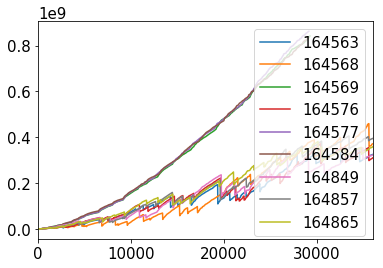

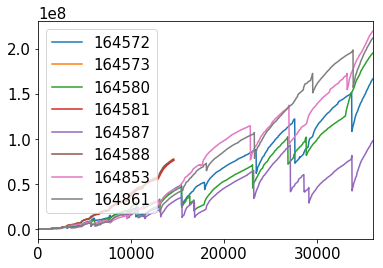

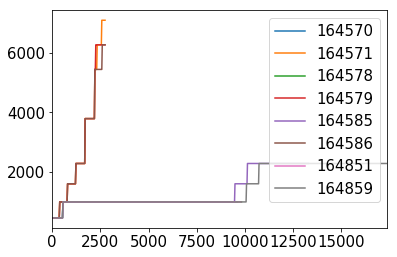

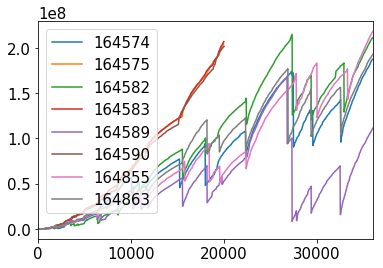

In [3]:
def untar(fname):
    try: shutil.rmtree("tmp")
    except: pass
    os.mkdir("tmp")
    tar = tarfile.open(fname)
    tar.extractall()
    tar.close()
def get_op(op, results, rank="4"):
    fname = ""
    untar(results + "/out/perf.tar.gz")
    shutil.move("perf/perf." + rank, "tmp/perf." + rank)
    fname = "tmp/perf." + rank
    df = pd.read_csv(fname, names=['ts', 'op', 'count'])
    df = df[df['op'] == op]

    shift = np.min(df['ts']) * np.ones(len(df['ts']))
    df['shift'] = df['ts'] - shift
    df['count'] = df['count'].astype(float)
    return df
def get_max_traj(results):
    if os.path.exists(results + "/times.out"):
        df = pd.read_csv(results + "/times.out", delimiter=" ", index_col=False, names=["wc", "traj"])
    else:
        untar(results + "/times.tar.gz")
        shutil.move("times.out", "tmp/times.out")                
        df = pd.read_csv("tmp/times.out", delimiter=" ", index_col=False, names=["wc", "traj"])
    return df.tail(1)

fig, ax = plt.subplots(1, 1)
for runs in [("../scale-workers-8-d100K-164563",
              "../scale-workers-8-d100K-164568",
              "../scale-workers-8-d100K-164569",
              "../scale-workers-8-d100K-164576",
              "../scale-workers-8-d100K-164577",
              "../scale-workers-8-d100K-164584",
              "../scale-workers-8-d100K-164849",
              "../scale-workers-8-d100K-164857",
              "../scale-workers-8-d100K-164865"
              )]:
    for run in runs:
        df = get_op("DBMemorySize", run)
        df.plot(y='count', ax=ax, label=run.split('-')[4])

fig, ax = plt.subplots(1, 1)
for runs in [("../scale-workers-8-d1M-164572",
              "../scale-workers-8-d1M-164573",
              "../scale-workers-8-d1M-164580",
              "../scale-workers-8-d1M-164581",
              "../scale-workers-8-d1M-164587",
              "../scale-workers-8-d1M-164588",
              "../scale-workers-8-d1M-164853",
              "../scale-workers-8-d1M-164861"
              )]:
    for run in runs:
        df = get_op("DBMemorySize", run)
        df.plot(y='count', ax=ax, label=run.split('-')[4])

fig, ax = plt.subplots(1, 1)
for runs in [("../scale-workers-8-d10M-164570",
              "../scale-workers-8-d10M-164571",
              "../scale-workers-8-d10M-164578",
              "../scale-workers-8-d10M-164579",
              "../scale-workers-8-d10M-164585",
              "../scale-workers-8-d10M-164586",
              "../scale-workers-8-d10M-164851",
              "../scale-workers-8-d10M-164859"
              )]:
    for run in runs:
        df = get_op("DBMemorySize", run)
        df.plot(y='count', ax=ax, label=run.split('-')[4])

fig, ax = plt.subplots(1, 1)
for runs in [("../scale-workers-8-d500K-164574",
              "../scale-workers-8-d500K-164575",
              "../scale-workers-8-d500K-164582",
              "../scale-workers-8-d500K-164583",
              "../scale-workers-8-d500K-164589",
              "../scale-workers-8-d500K-164590",
              "../scale-workers-8-d500K-164855",
              "../scale-workers-8-d500K-164863"
              )]:
    for run in runs:
        df = get_op("DBMemorySize", run)
        df.plot(y='count', ax=ax, label=run.split('-')[4])


10M does not give give us enough events, so focus on 3 runs that look good from our regime detection.

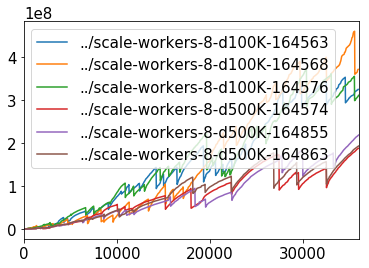

In [4]:
def plot_memory(ax, runs, rank="4"):
    for run in runs:
        df = get_op("DBMemorySize", run, rank=rank)
        df.plot(y='count', ax=ax, label=run)
fig, ax = plt.subplots(1, 1)
plot_memory(ax, ["../scale-workers-8-d100K-164563", "../scale-workers-8-d100K-164568", "../scale-workers-8-d100K-164576"])
plot_memory(ax, ["../scale-workers-8-d500K-164574", "../scale-workers-8-d500K-164855", "../scale-workers-8-d500K-164863"])
#plot_memory(ax, ["../baseline/scale-workers-8-d100K-NULL-166544", "../baseline/scale-workers-8-d100K-NULL-166549"], rank="1")

[335319122.6666667, 992003125.3333334, 199413410.66666666, 487610888.0, 208615466.66666666, 306188874.6666667]
[6075394.666666667, 6137672.333333333, 23210609.666666668, 23113673.666666668, 43185669.666666664, 43009753.666666664]
[80604.50909361226, 57857.777381744934, 33758.00193863507, 25113.00801488256, 40374.56154835891, 7173.860343094381]


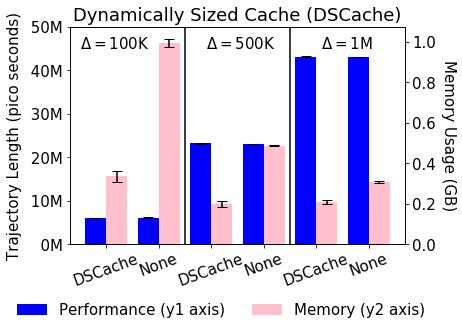

In [9]:
def get_max_op(op, results, rank="4"):
    fname = ""
    untar(results + "/out/perf.tar.gz")
    shutil.move("perf/perf." + rank, "tmp/perf." + rank)
    fname = "tmp/perf." + rank
    df = pd.read_csv(fname, names=['ts', 'op', 'count'])
    df = df[df['op'] == op]

    shift = np.min(df['ts']) * np.ones(len(df['ts']))
    df['shift'] = df['ts'] - shift
    #return df.head(int(len(df)*0.6)).tail(1)
    return df.tail(1)

def plot_traj_vs_mem(run_list, ax):
    trajs = []; terror = []; memory = []; merror = []; label=[]
    for runs in run_list:
        t = []; m = []
        for run in runs:
            t.append(float(get_max_traj(run)['traj']))
            try:
                mem = get_max_op("DBMemorySize", run)['count']
                m.append(float(mem))
            except:
                mem = get_max_op("DBMemorySize", run, rank="1")['count']
                m.append(float(mem))
        #l = os.path.basename(run).split('-')[3].split('d')[1]
        if "NULL" in runs[0]:
            label.append("None")
        else:
            label.append("DSCache")
        trajs.append(float(np.mean(t))); terror.append(float(np.std(t)))
        memory.append(float(np.mean(m))); merror.append(float(np.std(m)))
    print memory
    print trajs
    print terror
    ax.bar(np.arange(len(trajs)) - 0.2, trajs, yerr=terror, capsize=5, width=0.4, label="Performance (y1 axis)", color='blue')
    ax.set_xticks(range(0, len(trajs))); ax.set_xticklabels(label, rotation=20)
    ax.set_ylim(0, 50*1000*1000); ax.set_yticklabels("")
    ax.set_ylabel("Trajectory Length (pico seconds)")
    #ax.set_ylim(0, 6.2*1000*1000)
    ax.set_yticklabels(['{:3.0f}M'.format(yval/(1000*1000)) for yval in ax.get_yticks()])
    ax.set_title("Dynamically Sized Cache (DSCache)")
    ax2 = ax.twinx()
    ax2.bar(np.arange(len(memory)) + 0.2, memory, yerr=merror, capsize=5, width=0.4, color='pink', label="Memory (y2 axis)")
    ax2.set_xticks(range(0, len(memory)))
    ax2.set_ylabel("Memory Usage (GB)", rotation=270, labelpad=20); ax2.set_ylim(0, 1*1024*1024*1024); ax2.set_yticklabels(['{:3.1f}'.format(yval/(1000*1000*1000)) for yval in ax2.get_yticks()])
    ax.annotate(r'$\Delta=100$K', xytext=(-0.5, 45*1000000), xy=(-0.5, 45*1000000))
    ax.annotate(r'$\Delta=500$K', xytext=(1.9, 45*1000000), xy=(1.9, 45*1000000))
    ax.annotate(r'$\Delta=1$M', xytext=(4.1, 45*1000000), xy=(4.1, 45*1000000))
    ax.legend(bbox_to_anchor=(-0.2, -0.4), loc='lower left', frameon=False)
    ax2.legend(bbox_to_anchor=(1.1, -0.4), loc='lower right', frameon=False)
    

fig, ax = plt.subplots(1, 1)
plot_traj_vs_mem([("../scale-workers-8-d100K-164563",
                   "../scale-workers-8-d100K-164568",
                   "../scale-workers-8-d100K-164576"),
                  ("../baseline/scale-workers-8-d100K-NULL-166668", 
                   "../baseline/scale-workers-8-d100K-NULL-166672",
                   "../baseline/scale-workers-8-d100K-NULL-166676"),
                  ("../scale-workers-8-d500K-164574",
                   "../scale-workers-8-d500K-164855", 
                   "../scale-workers-8-d500K-164863"),
                  ("../baseline/scale-workers-8-d500K-NULL-166671",
                   "../baseline/scale-workers-8-d500K-NULL-166675",
                   "../baseline/scale-workers-8-d500K-NULL-166679"),
                  ("../scale-workers-8-d1M-164580",
                   "../scale-workers-8-d1M-164853",
                   "../scale-workers-8-d1M-164861"),
                  ("../baseline/scale-workers-8-d1M-NULL-166670", 
                   "../baseline/scale-workers-8-d1M-NULL-166674",
                   "../baseline/scale-workers-8-d1M-NULL-166678"),
                 ], ax)

plt.axvline(x=1.5, color='black')
plt.axvline(x=3.5, color='black')
fig.savefig("../../../paper/figures/dscache-vs-none.png", bbox_inches='tight', dpi=400)


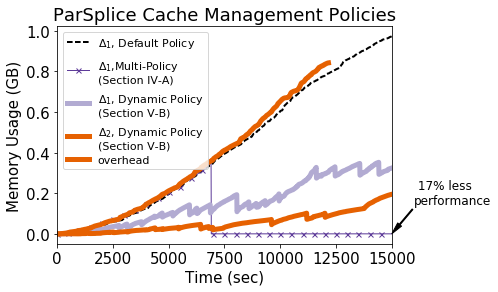

In [29]:
def get_op(op, results, rank="4"):
    fname = ""
    untar(results + "/out/perf.tar.gz")
    shutil.move("perf/perf." + rank, "tmp/perf." + rank)
    fname = "tmp/perf." + rank
    df = pd.read_csv(fname, names=['ts', 'op', 'count'])
    df = df[df['op'] == op]

    shift = np.min(df['ts']) * np.ones(len(df['ts']))
    df['shift'] = df['ts'] - shift
    df['count'] = df['count'].astype(float)
    return df

def plot_memory(ax, label, runs, rank="4", ls='-', color='black', marker='', lw=1):
    for run in runs:
        df = get_op("DBMemorySize", run, rank=rank)
        df.plot(y='count', x='shift', ax=ax, label=label, color=color, ls=ls, lw=lw, marker=marker, markersize=5, markevery=50)

fig, ax = plt.subplots(1, 1)
plot_memory(ax, r'$\Delta_1$, Default Policy ',["../baseline/scale-workers-8-d100K-NULL-166668"], rank="1", ls='--', lw=2)
plot_memory(ax, r'$\Delta_1$'+",Multi-Policy\n(Section IV-A)",   ["../../regime-detection/baseline/scale-cachedecrease-8n-100-72372"], rank="1",color='#5e3c99', marker='x')
plot_memory(ax, r'$\Delta_1$'+", Dynamic Policy\n(Section V-B)", ["../scale-workers-8-d100K-164563"], lw=5, color='#b2abd2')
plot_memory(ax, r'$\Delta_2$'+", Dynamic Policy\n(Section V-B)", ["../scale-workers-8-d1M-164580"], lw=5, color='#e66101')
plot_memory(ax, "overhead", ["../overhead/scale-workers-8-d100K-NULL-164866"], lw=5, color='#e66101')
ax.set_ylabel("Memory Usage (GB)")
ax.set_xlabel("Time (sec)")
#ax.set_ylim(0, 1.2*1000*1000*1000)
ax.set_yticklabels(['{:3.1f}'.format(yval/(1000*1000*1000)) for yval in ax.get_yticks()])
ax.legend(fontsize=11)
ax.set_title("ParSplice Cache Management Policies")
#ax.annotate(' 17%\nslow-\ndown', xytext=(16000, 0.2*1000*1000*1000), xy=(15000, 0.001*1000*1000*1000), fontsize=15, ha='left', va='center',
#           arrowprops=dict(facecolor='black', width=1, headwidth=5))
ax.annotate(' 17% less\nperformance', xytext=(16000, 0.2*1000*1000*1000), xy=(15000, 0.001*1000*1000*1000), fontsize=12, ha='left', va='center',
           arrowprops=dict(facecolor='black', width=1, headwidth=5))

#fig.savefig("../../../paper/figures/memory-vs-time.png", bbox_inches='tight', dpi=400)